# Research Progress Meeting 2020-04-xx

![Keystone spill 2019](../resources/keystone_1.jpg)

Image:Keystone pipeline leak on Oct 29, 2019. https://www.rawstory.com/2019/11/it-happens-over-and-over-and-over-and-over-keystone-pipeline-leaks-at-least-383000-gallons-of-crude-oil-in-north-dakota/

### Purpose

1. Turn the data on its head - look at the incidents
2. Look at injuries and fatalities

### Questions

1. Top 10 incidens
2. How many incidents do we need to care about?
3. How do the largest incidents fare in terms of net loss and vice versa?
    * Do we need to look at spill volume, net loss, or both?
4. What are the largest incidents by decade?
5. Who are the operators?
6. What are the (stated) causes of these incidents?
7. Where are these incidents located?

## Setup

In [1]:
library(oildata)
library(tidyverse)
library(gridExtra)

packageVersion("oildata")

── Attaching packages ─────────────── tidyverse 1.3.0 ──
✔ ggplot2 3.2.1     ✔ purrr   0.3.3
✔ tibble  2.1.3     ✔ dplyr   0.8.3
✔ tidyr   1.0.0     ✔ stringr 1.4.0
✔ readr   1.3.1     ✔ forcats 0.4.0
── Conflicts ────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()

Attaching package: ‘gridExtra’

The following object is masked from ‘package:dplyr’:

    combine



[1] ‘1.1.6’

In [2]:
incidents <- subset(incidents, commodity %in% c("hvl", "rpp", "crude"))

glimpse(incidents)

Observations: 9,649
Variables: 25
$ DATAFILE_AS_OF     <dttm> 2020-03-31 04:52:07, 2020-03-31 04:52:07, 2020-03…
$ significant        <lgl> TRUE, TRUE, TRUE, TRUE, TRUE, TRUE, TRUE, TRUE, TR…
$ serious            <lgl> FALSE, FALSE, FALSE, FALSE, FALSE, FALSE, FALSE, F…
$ incident_ID        <dbl> 19860003, 19860027, 19860028, 19860029, 19860030, …
$ ID                 <dbl> 22907, 12628, 12628, 18273, 18273, 18718, 15490, 9…
$ name               <chr> "Wyco Pipe Line", "Mobil Pipeline", "Mobil Pipelin…
$ on_offshore        <chr> "onshore", "onshore", "onshore", "onshore", "onsho…
$ installation_year  <dbl> 1966, 1963, 1926, 1939, 1955, 1956, 1930, 1958, 19…
$ CAUSE              <chr> "OUTSIDE FORCE DAMAGE", "CORROSION", "OUTSIDE FORC…
$ cause              <chr> "excavation damage", "corrosion", "excavation dama…
$ MAP_SUBCAUSE       <chr> "THIRD PARTY EXCAVATION DAMAGE", "INTERNAL", "THIR…
$ fatalities         <dbl> 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,…
$ injuries        

## Top 10 incidents

There are five relevant metrics for identifying relevant spills:
1. Volume of commodity spilled
2. Net loss of commodity
3. Damage in USD
4. Number of injuries
5. Number of fatalities

I will proceed in three steps:
1. Identify the top 10 spills for each metric individually
2. Look at the overlap between them
3. Take a qualitative look at the spills (location, circumstances, causes etc.)

### By spill volume

In [3]:
irrelevant_cols <- quo(-c(narrative, DATAFILE_AS_OF, CAUSE, cost, recovered))

incidents %>%
    top_n(10, volume) %>%
    select(!! irrelevant_cols)

significant,serious,incident_ID,ID,name,on_offshore,installation_year,cause,MAP_SUBCAUSE,fatalities,injuries,cost_1984,TOTAL_COST_CURRENT,commodity,volume,net_loss,year,date,long,lat
<lgl>,<lgl>,<dbl>,<dbl>,<chr>,<chr>,<dbl>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<dbl>,<dbl>,<dbl>,<date>,<chr>,<chr>
TRUE,TRUE,19860159,15490,Phillips Pipe Line,onshore,1939,all other causes,MISCELLANEOUS,0,26,473244.748,1010414.80,rpp,55000,NA,1986,1986-09-03,NA,NA
TRUE,FALSE,19870101,12452,Mid - America Pipeline Co (Mapco),onshore,1967,all other causes,MISCELLANEOUS,0,0,0.000,0.00,hvl,122000,122000,1987,1987-04-03,NA,NA
TRUE,FALSE,19890091,11169,Lakehead Pipe Line,onshore,1965,material/weld/equip failure,UNSPECIFIED PIPE BODY OR SEAM,0,0,1292756.704,2760137.34,crude,31300,22300,1989,1989-07-12,NA,NA
TRUE,FALSE,19910057,11169,Lakehead Pipe Line,onshore,1967,all other causes,MISCELLANEOUS,0,0,11559914.712,24681328.05,crude,40500,700,1991,1991-03-02,NA,NA
TRUE,FALSE,19980095,18214,The Shamrock Pipe Line,onshore,1979,all other causes,MISCELLANEOUS,0,0,6434.727,13738.65,crude,32903,297,1998,1998-05-13,NA,NA
TRUE,FALSE,20020383,2731,Chevron Pipeline,onshore,1966,corrosion,EXTERNAL,0,0,365175.296,779678.01,hvl,33010,33010,2002,2002-10-23,NA,NA
TRUE,FALSE,20060071,31476,Semcrude,onshore,1930,corrosion,INTERNAL,0,0,413417.510,882678.93,crude,49000,100,2006,2006-02-19,31.59494,58.68900
TRUE,FALSE,20080020,31684,Conocophillips,onshore,1948,material/weld/equip failure,PIPE SEAM,0,0,3734417.150,7973274.64,crude,31322,30991,2008,2008-01-06,W102'57211,N3303001
TRUE,FALSE,20150071,31618,Enterprise Products Operating,onshore,2013,material/weld/equip failure,"CONSTRUCTION, INSTALLATION OR FABRICATION-RELATED",0,0,3466805.478,7401902.65,hvl,30565,30565,2015,2015-01-26,-80.584594,40.366817


In [4]:
top_volume <- incidents %>%
    top_n(10, volume) %>%
    arrange(desc(volume)) %>%
    mutate(n = 1:n()) %>%
    ggplot(aes(n, volume)) + 
        geom_col(color = "black", fill = "tan") +
        geom_text(aes(label = paste(name, "-", year)), angle = 90, 
                  hjust = c(1, rep(0, 9)), nudge_y = c(-1000, rep(1000, 9))) +
        scale_x_continuous(breaks = 1:10) +
        labs(x = NULL, y = "Volume spilled (in barrels)")

options(repr.plot.width=8, repr.plot.height=6)

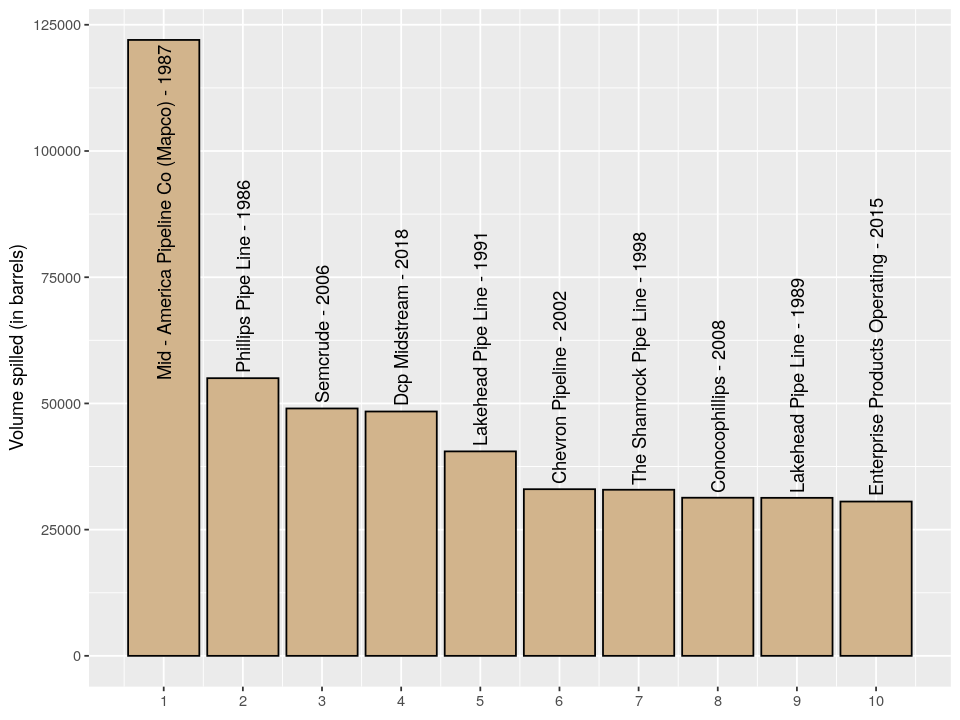

In [5]:
top_volume

### Other metrics

In [6]:
incidents$name_short <- substr(incidents$name, 1, 15)
incidents$year_short <- substr(incidents$year, 3, 4)

top_net_loss <- incidents %>%
    top_n(10, net_loss) %>%
    arrange(desc(net_loss)) %>%
    mutate(n = 1:n()) %>%
    ggplot(aes(n, net_loss)) + 
        geom_col(color = "black", fill = "tan") +
        geom_text(aes(label = paste0(name_short, " '", year_short)), angle = 90, 
                  hjust = c(1, rep(0, 9)), nudge_y = c(-1000, rep(1000, 9))) +
        labs(x = NULL, y = "Net loss (in barrels)") +
        theme(axis.title.x=element_blank(), axis.text.x=element_blank(), axis.ticks.x=element_blank())

top_cost <- incidents %>%
    top_n(10, cost) %>%
    arrange(desc(cost)) %>%
    mutate(n = 1:n()) %>%
    ggplot(aes(n, cost)) + 
        geom_col(color = "black", fill = "tan") +
        geom_text(aes(label = paste(name_short, " '", year_short)), angle = 90, 
                  hjust = c(1, rep(0, 9)), nudge_y = c(-10000000, rep(10000000, 9))) +
        labs(x = NULL, y = "Net loss (in barrels)") +
        theme(axis.title.x=element_blank(), axis.text.x=element_blank(), axis.ticks.x=element_blank())

top_injuries <- incidents %>%
    top_n(10, injuries) %>%
    arrange(desc(injuries)) %>%
    mutate(n = 1:n()) %>%
    ggplot(aes(n, injuries)) + 
        geom_col(color = "black", fill = "tan") +
        geom_text(aes(label = paste(name_short, "'", year_short)), angle = 90, 
                  hjust = c(1, 1, rep(0, 8)), nudge_y = c(-0.05, -0.05, rep(0.05, 8))) +
        labs(x = NULL, y = "Net loss (in barrels)") +
        scale_y_log10() +
        theme(axis.title.x=element_blank(), axis.text.x=element_blank(), axis.ticks.x=element_blank())

top_fatalities <- incidents %>%
    top_n(10, fatalities) %>%
    arrange(desc(fatalities)) %>%
    mutate(n = 1:n()) %>%
    top_n(10, n) %>%
    ggplot(aes(n, fatalities)) + 
        geom_col(color = "black", fill = "tan") +
        geom_text(aes(label = paste(name_short, "'", year_short)), angle = 90, 
                  hjust = c(1), nudge_y = c(-0.05)) +
        labs(x = NULL, y = "Net loss (in barrels)") +
        theme(axis.title.x=element_blank(), axis.text.x=element_blank(), axis.ticks.x=element_blank())

top_grid <- arrangeGrob(top_net_loss, top_cost, top_injuries, top_fatalities, ncol=2)

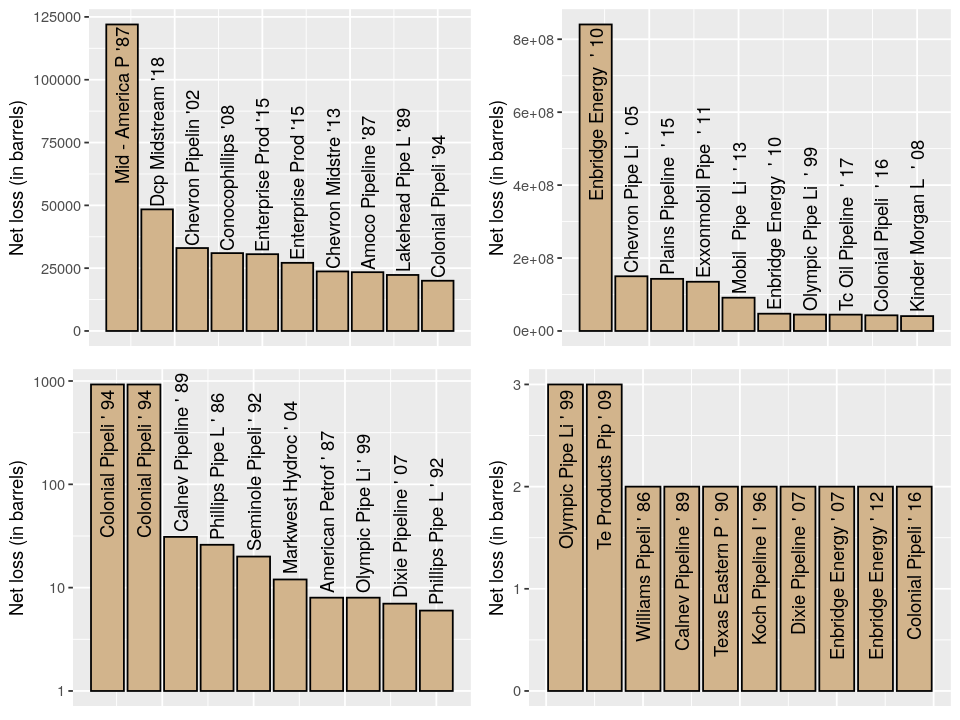

In [7]:
grid::grid.draw(top_grid)

facet wrap by incidents, show the bar

## How many incidents should we care about?

In [8]:
top_100_volume <- incidents %>%
    select(-narrative) %>%
    arrange(desc(volume)) %>%
    top_n(100, volume) %>%
    mutate(n = 1:100) %>%
    ggplot(aes(n, volume)) +
        geom_col()

top_100_net_loss <- incidents %>%
    select(-narrative) %>%
    arrange(desc(net_loss)) %>%
    top_n(100, net_loss) %>%
    mutate(n = 1:100) %>%
    ggplot(aes(n, net_loss)) +
        geom_col()

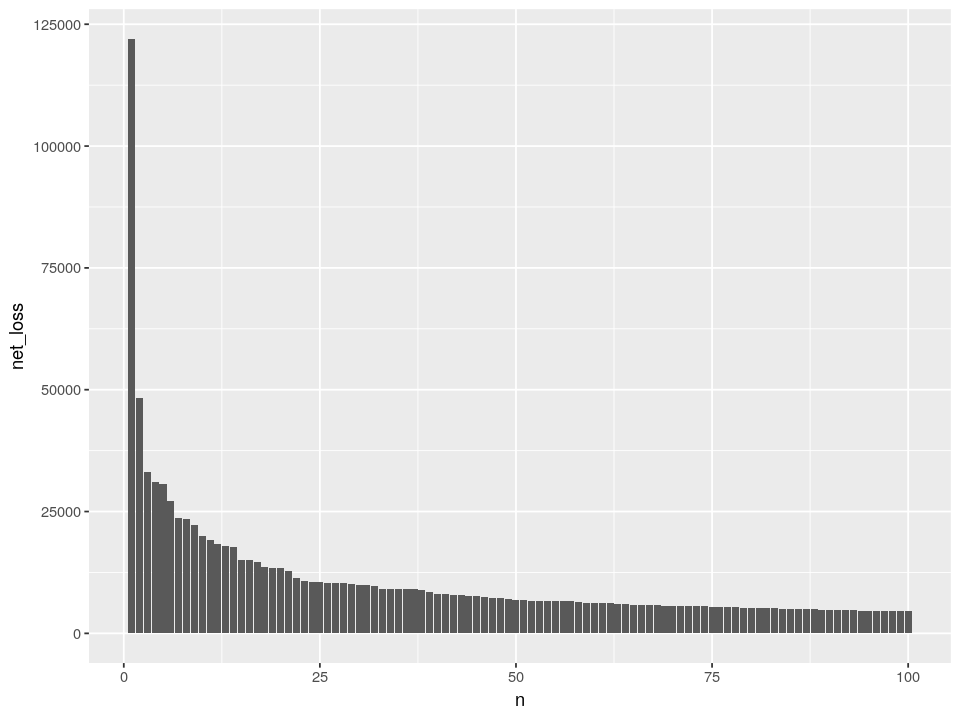

In [9]:
top_100_net_loss

In [10]:
volume_cumulative_500 <- incidents %>%
    select(-narrative) %>%
    arrange(desc(volume)) %>%
    top_n(500, volume) %>%
    mutate(n = 1:n(), 
           volume = cumsum(volume)) %>%
    ggplot(aes(n, volume)) +
        geom_col()

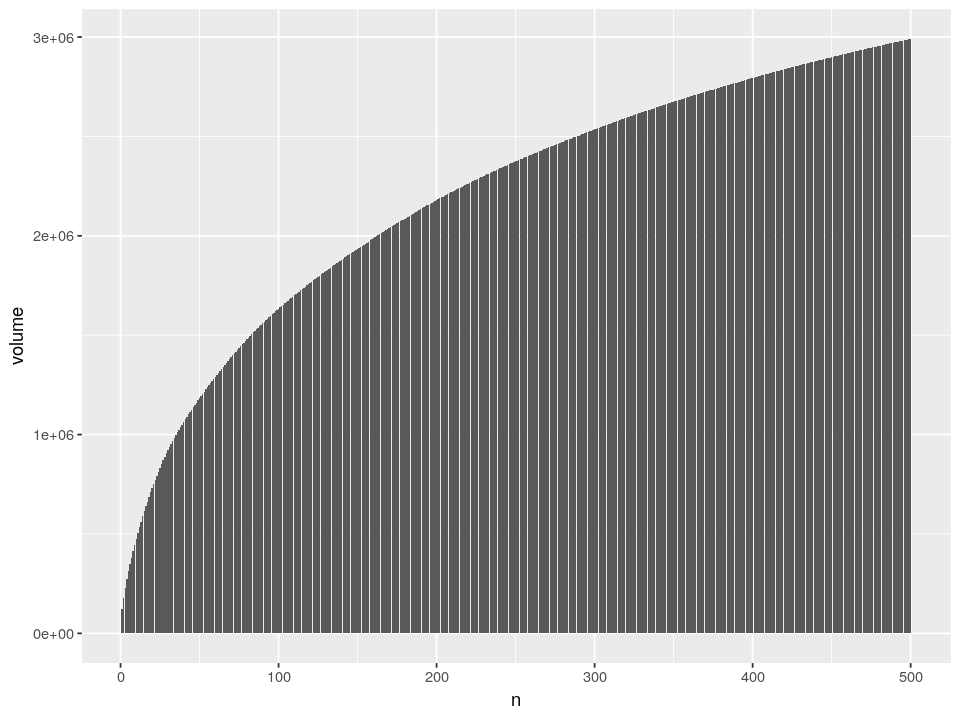

In [11]:
volume_cumulative_500

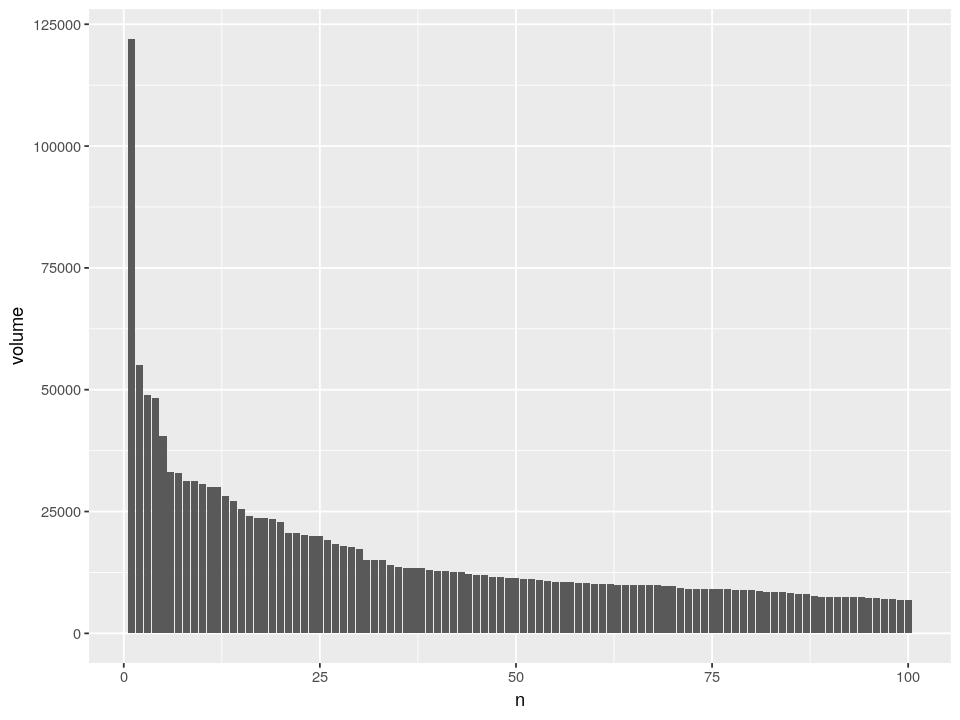

In [12]:
incidents %>%
    select(-narrative) %>%
    arrange(desc(volume)) %>%
    top_n(100, volume) %>%
    mutate(n = 1:100) %>%
    ggplot(aes(n, volume)) +
        geom_col()

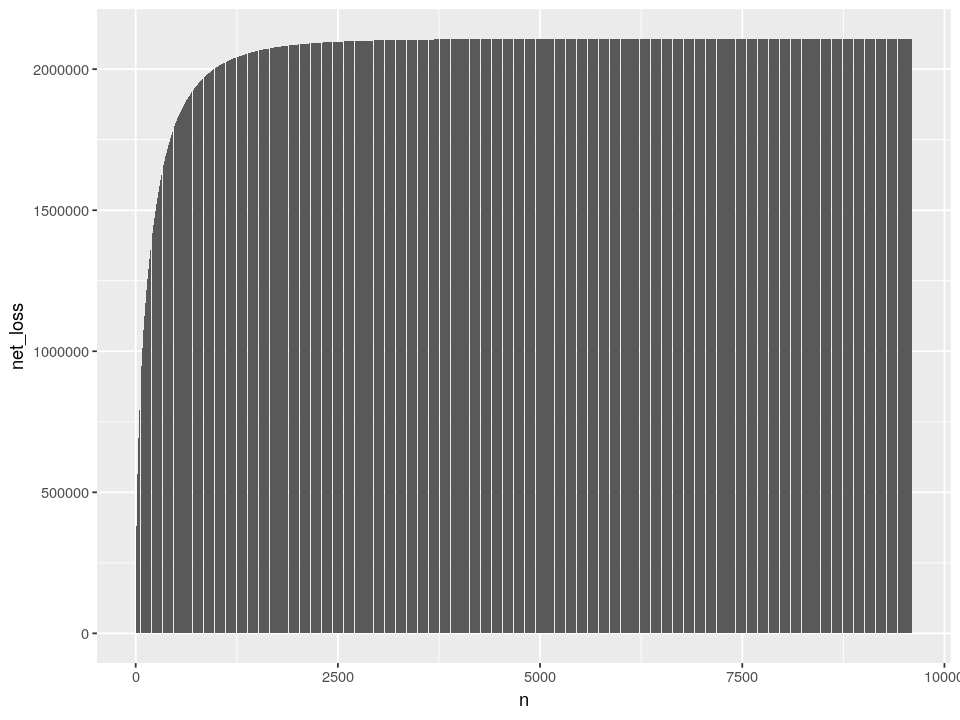

In [13]:
incidents %>%
    select(-narrative) %>%
    arrange(desc(net_loss)) %>%
    top_n(10000, net_loss) %>%
    mutate(n = 1:n(), 
           volume = cumsum(volume),
           net_loss = cumsum(net_loss)) %>%
    ggplot(aes(n, net_loss)) +
        geom_col()